# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.dropna(subset=['bill_depth_mm'], inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

num_transform = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat_transform = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])

ct = ColumnTransformer([
    ('num', num_transform, make_column_selector(dtype_include=np.number)),
    ("cat", cat_transform, make_column_selector(dtype_include=object))
])

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
X = penguins.drop(columns=['bill_depth_mm'])
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_lr = Pipeline(
    [("preprocessor", ct),
     ("regressor", LinearRegression())]
     )

pipeline_knn5 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=5))]
)

pipeline_knn10 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=10))]
)

pipeline_tree = Pipeline(
    [("preprocessor", ct),
     ("decision", DecisionTreeRegressor())]
)

In [5]:
pipeline_lr.fit(X_train, y_train)
pipeline_knn5.fit(X_train, y_train)
pipeline_knn10.fit(X_train, y_train)
pipeline_tree.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('decision', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


               Model   Data      RMSE
0  Linear Regression  Train  0.789856
1  Linear Regression   Test  0.745515
2          kNN (k=5)  Train  0.675607
3          kNN (k=5)   Test  0.829975
4         kNN (k=10)  Train  0.733599
5         kNN (k=10)   Test  0.788410
6      Decision Tree  Train  0.000000
7      Decision Tree   Test  1.056450


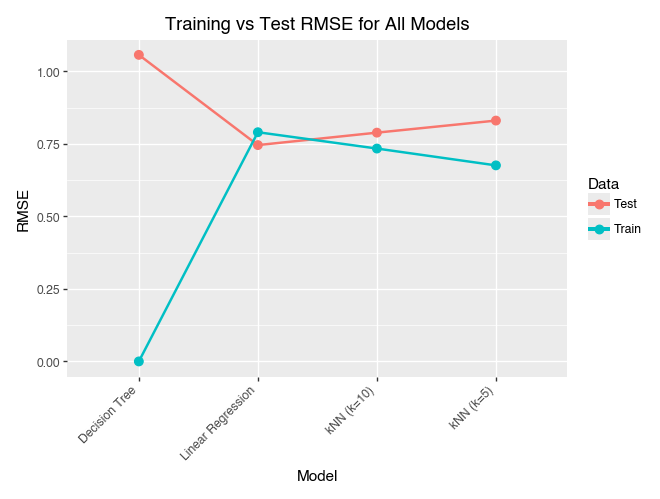

In [7]:
from plotnine import *
models = {
    "Linear Regression": pipeline_lr,
    "kNN (k=5)": pipeline_knn5,
    "kNN (k=10)": pipeline_knn10,
    "Decision Tree": pipeline_tree
}

results = []

for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results.append([name, "Train", train_rmse])
    results.append([name, "Test", test_rmse])

rmse_df = pd.DataFrame(results, columns=["Model", "Data", "RMSE"])
print(rmse_df)

(
    ggplot(rmse_df, aes(x="Model", y="RMSE", color="Data", group="Data"))
    + geom_point(size=3)
    + geom_line(size=1)
    + labs(title="Training vs Test RMSE for All Models")
    + theme(axis_text_x=element_text(rotation=45, ha="right"))
)


Linear Regression was the best model because it achieved the lowest test RMSE, indicating the strongest generalization performance among the four models.